In [8]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt    
import seaborn as sns    
import re   
import os   
import warnings
warnings.filterwarnings("ignore")
from preprocess import *
import streamlit as st
from stats import *
from wordcloud import *

#### Counting Parameters

In [6]:
file_name = "WhatsApp Chat with CodeAcuity.txt"
user = "Overall"

df = preprocess(file_name=file_name)
df_no_groups = df[df["User"]!="Group Notification"]
list_of_users = np.sort(df_no_groups["User"].unique())

user_messages = {}
user_messages["Overall"] = df_no_groups["Message"].values
for i in list_of_users:
    user_messages[i] = df_no_groups[df_no_groups["User"]==i]["Message"].values
    
list_of_users = list(user_messages.keys())

counting_parameters = retrieve_all_counting_parameters(user_messages,user)

#### Most Busy Users

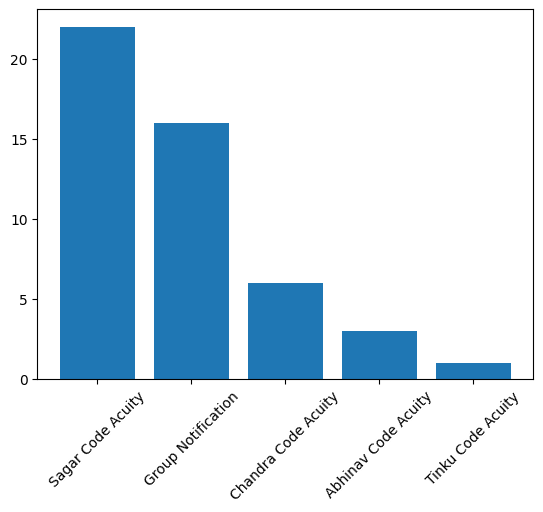

In [7]:
ax,df_user_counts = return_busy_users(file_name=file_name,df=df)

plt.savefig("amith.png")

#### WordCloud

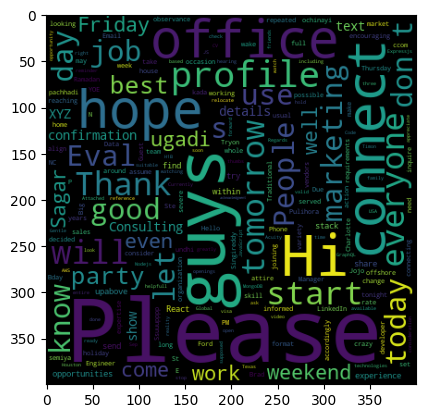

In [24]:
messages = user_messages[user]
        
total_messages = len(messages)
        
words_5 = ""
for i in messages:
    words_5 += (i + " ")
        
words_4 = re.sub(pattern="(https://\S+\s+)",repl="",string=words_5)
words_3 = re.sub(pattern="(<Media omitted>)",repl="",string=words_4)
words_2 = re.sub(pattern="(<This message was edited>)",repl="",string=words_3)
words_11 = words_2.replace("\n", " ")
words_1 = words_11.replace(".","")
words = words_1.split(" ")

while "" in words:
    words.remove("")

text = ""
for i in words:
    text += (i + " ")
    
wc = WordCloud(width=400,height=400,margin=4,random_state=np.random.randint(0,1000))
word_cloud = wc.generate(text)
ax = plt.figure()
plt.imshow(word_cloud)